In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import math 
train_df = pd.read_csv("/content/drive/MyDrive/cs541/income.csv")

Mounted at /content/drive


In [ ]:
train_df = train_df.drop(columns=["education"])
train_df.head(20)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [ ]:
train_df["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
categorical_columns, quantitative_columns = [], []
for col in train_df.columns:
  if train_df[col].dtypes==object:
    categorical_columns.append(col)
  else:
    quantitative_columns.append(col) 

In [ ]:
for col in categorical_columns:
  col_mode = train_df[col].mode().values[0]
  train_df[col] = train_df[col].replace(' ?', col_mode)

for col in quantitative_columns:
  col_mean = train_df[col].mean()
  train_df[col] = train_df[col].replace(' ?', col_mean)

In [ ]:
train_df["occupation"].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
for column in categorical_columns:
  unique_values=train_df[column].unique()
  dictionary = dict()
  for i,val in enumerate(unique_values):
    dictionary[val]=i 
  train_df[column]=train_df[column].map(dictionary)

In [ ]:
for col in quantitative_columns:
  train_df[col] =  (train_df[col]-train_df[col].min())/(train_df[col].max()-train_df[col].min())

In [ ]:
train_df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,0,0.044302,0.800000,0,0,0,0,0,0.02174,0.0,0.397959,0
1,0.452055,1,0.048238,0.800000,1,1,1,0,0,0.00000,0.0,0.122449,0
2,0.287671,2,0.138113,0.533333,2,2,0,0,0,0.00000,0.0,0.397959,0
3,0.493151,2,0.151068,0.400000,1,2,1,1,0,0.00000,0.0,0.397959,0
4,0.150685,2,0.221488,0.800000,1,3,2,1,1,0.00000,0.0,0.397959,1


In [ ]:
from scipy.spatial.distance import cdist

# def loss(centers, points):


def kmeans(X, k, epochs):
  idx = np.random.choice(len(X), k, replace=False)
  centroids = X[idx, :]
  distances = cdist(X, centroids, 'euclidean')
  points = np.array([np.argmin(i) for i in distances])
  for i in range(epochs):
    centroids = []
    for idx in range(k):
      cent = X[points==idx].mean(axis=0)
      centroids.append(cent)

    centroids = np.vstack(centroids)
    distances = cdist(X, centroids, 'euclidean')
    points = np.array([np.argmin(i) for i in distances])

  return points

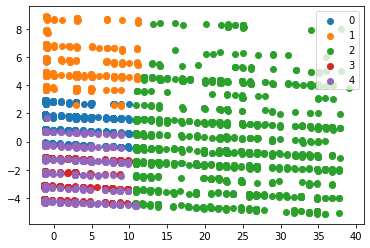

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(2)
df = pca.fit_transform(train_df)
label = kmeans(train_df.to_numpy(), 5, 10)
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
import sys
from telnetlib import XASCII
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


class KMeans1():
    def dist(self, x, y):
        xSumSquare = np.sum(np.square(x), axis=1)
        ySumSquare = np.sum(np.square(y), axis=1)
        mul = np.dot(x, y.T)
        dists = np.sqrt(abs(xSumSquare[:, np.newaxis] + ySumSquare - 2 * mul))
        return dists

    def update_cluster(self, centers, X):
        cluster_idx = np.empty([X.shape[0]])
        distances = self.dist(X, centers)
        cluster_idx = np.argmin(distances, axis=1)
        return cluster_idx

    def update_centroids(self, old_centers, cluster_idx, X):
        new_centers = np.empty(old_centers.shape)
        for i in range(old_centers.shape[0]):
            new_centers[i] = np.mean(X[cluster_idx == i], axis=0)
        return new_centers

    def loss(self, centers, cluster_idx, X):  # [5 pts]
        dists = self.dist(X, centers)
        loss = 0.0
        for i in range(X.shape[0]):
            loss = loss + np.square(dists[i][cluster_idx[i]])
        return loss

    def cluster(self, X, K, epoch=100):
        row, col = X.shape
        centers = np.empty([K, col])
        for number in range(K):
            randIndex = np.random.randint(row)
            centers[number] = X[randIndex]

        for i in range(epoch):
            cluster_idx = self.update_cluster(centers, X)
            centers = self.update_centroids(centers, cluster_idx, X)
            loss = self.loss(centers, cluster_idx, X)
            K = centers.shape[0]
            # print('iter %d, loss: %.4f' % (i, loss))
        return cluster_idx, centers, loss

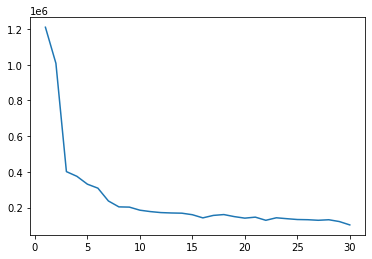

In [ ]:
kmean1 = KMeans1()
X = train_df.to_numpy()

max_no_clusters = 30
y_val = np.empty(max_no_clusters)
for i in range(max_no_clusters):
  cluster_idx, centers, y_val[i] = kmean1.cluster(X, K=i+1, epoch=100)

plt.plot(np.arange(max_no_clusters) + 1, y_val)
plt.show()